<a href="https://colab.research.google.com/github/cwcheng0/practicepython/blob/master/SKLearn_Bayers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Naive Bayers in iris
# 2019-1-27
# Source https://ithelp.ithome.com.tw/articles/10200538
# -*- coding: utf-8 -*-
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB

iris = datasets.load_iris()  #load進iris的資料庫

features = iris.feature_names
X = iris.data  
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)  
gnb = GaussianNB()
y_result = gnb.fit(X_train, y_train).predict(X_test)

accuracy_score(y_test, y_result)
print("Number of mislabeled points out of a total %d points : %d"% (iris.data.shape[0],(y_test != y_result).sum()))

Number of mislabeled points out of a total 150 points : 0


In [2]:
# With Matlib
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import BernoulliNB
import matplotlib.pyplot as plt

bc = datasets.load_breast_cancer()  #load進breast_cancer的資料庫

features = bc.feature_names
print(features)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [3]:
# Give column names
n = range(10, 31)
n_scores = []
for nn in n:
    X = bc.data[:,:nn] #取到第nn欄位
    y = bc.target
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)  
    clf = BernoulliNB(alpha=0.6) #alpha也是可以自由調整的
    clf.fit(X_train, y_train) #MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True) #alpha->smoothing parameter(0 for no smoothing)
    y_result = clf.predict(X_test)
    n_scores.append(accuracy_score(y_test, y_result))
    print(nn)
    print("Number of mislabeled points out of a total %d points : %d"% (bc.data.shape[0],(y_test != y_result).sum()))

10
Number of mislabeled points out of a total 569 points : 67
11
Number of mislabeled points out of a total 569 points : 57
12
Number of mislabeled points out of a total 569 points : 68
13
Number of mislabeled points out of a total 569 points : 66
14
Number of mislabeled points out of a total 569 points : 68
15
Number of mislabeled points out of a total 569 points : 67
16
Number of mislabeled points out of a total 569 points : 63
17
Number of mislabeled points out of a total 569 points : 56
18
Number of mislabeled points out of a total 569 points : 77
19
Number of mislabeled points out of a total 569 points : 60
20
Number of mislabeled points out of a total 569 points : 59
21
Number of mislabeled points out of a total 569 points : 48
22
Number of mislabeled points out of a total 569 points : 60
23
Number of mislabeled points out of a total 569 points : 63
24
Number of mislabeled points out of a total 569 points : 53
25
Number of mislabeled points out of a total 569 points : 62
26
Numbe

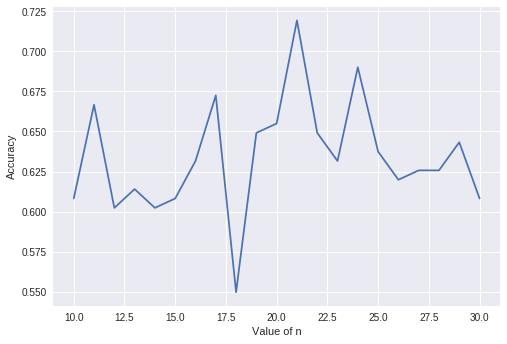

In [4]:
# Draw this map
plt.plot(n,n_scores)
plt.xlabel('Value of n')
plt.ylabel('Accuracy')
plt.show()